In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import joblib

In [3]:
import time

starting_time = time.time()
data = pd.read_csv('/content/drive/MyDrive/Datasets/Age_Features.csv')
print("data loaded in " + str(time.time()-starting_time) + "ms")

print(data.head())

data loaded in 0.7238965034484863ms
           0          1          2          3         4         5          6  \
0 -485.32660  85.435350   4.069478  24.093443  3.126821 -0.270201 -15.825314   
1 -388.18378  86.072050 -22.519470  29.831640  5.993802 -0.556428  -4.191688   
2 -644.01230  38.248410  -3.223190   5.302774  0.608917  4.737635  -6.094546   
3 -419.94672  64.995890   7.515232  37.980050 -2.965712 -4.039450 -15.871311   
4 -414.37213  60.488026 -22.330685  14.969538 -0.357641 -4.615941 -14.537808   

           7          8          9  ...        31        32        33  \
0  -4.965300 -12.058776 -15.967352  ... -4.656427 -2.517286 -3.480652   
1  -7.752582 -13.875486  -3.235075  ... -0.289661 -0.171426 -2.062645   
2   2.516751  -3.343449   0.025296  ... -1.286000 -0.384135 -0.313414   
3  -9.517945 -11.235235 -11.371832  ...  2.400531  2.844860  2.328211   
4 -18.598532  -6.955237  -1.671587  ...  0.582309  1.028616 -0.172167   

         34        35        36        37   

In [4]:
data.shape

(5783, 41)

In [5]:
#printing all columns
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', 'age'],
      dtype='object')

In [6]:
#dropping the column Unnamed: 0 to removed shuffled index


In [7]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', 'age'],
      dtype='object')

In [8]:
#separating features and target outputs
X = data.drop('age', axis = 1).values
y = data['age'].values

In [9]:
#Added by H
# X = joblib.load('/content/X.joblib')
# print(X.shape)
# y = joblib.load('/content/y.joblib')
# print(y.shape)

In [10]:
print(pd.DataFrame(y))

             0
0     twenties
1     fourties
2     fourties
3     twenties
4     fourties
...        ...
5778  thirties
5779  thirties
5780  thirties
5781  thirties
5782  thirties

[5783 rows x 1 columns]


## SVM

Implementing SVM with Scikit-Learn

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
X.shape, y.shape

((5783, 40), (5783,))

In [13]:
# prompt: show me if the data is balanced

from collections import Counter

print(Counter(y))

Counter({'twenties': 1835, 'thirties': 1644, 'fifties': 1283, 'teens': 535, 'fourties': 378, 'sixties': 93, 'seventies': 15})


In [14]:
np.unique(y)

array(['fifties', 'fourties', 'seventies', 'sixties', 'teens', 'thirties',
       'twenties'], dtype=object)

X variable contains attributes while y variable contains corresponding labels.

Once the data is divided into attributes and labels, the final preprocessing step is to divide data into training and test sets. The model_selection library of the Scikit-Learn library contains the train_test_split method that allows us to divide data into training and test sets.

In [15]:
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE

In [16]:
#Split the dataset into training and testing sets (X: features, y: target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after SMOTE:
twenties     1480
fifties      1480
thirties     1480
teens        1480
seventies    1480
fourties     1480
sixties      1480
Name: count, dtype: int64


In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

It is the time to train our SVM on the training data. Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. We have set the kernel to linear.

In [18]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method. Execute the following code to train the algorithm:

In [19]:
# import time

# starting_time = time.time()
# svclassifier.fit(X_train, y_train)
# print("Trained model in %s ms " % str(time.time() - starting_time))

To make predictions, the predict method of the SVC class is used.

In [20]:
# y_pred = svclassifier.predict(X_test)

Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Scikit-Learn's metrics library contains the classification_report and confusion_matrix methods, which can be readily used to find out the values for these important metrics.
We have used the following code for finding these metrics:

In [21]:
# from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
# import seaborn as sn

# print(classification_report(y_test,y_pred))

# acc = float(accuracy_score(y_test,y_pred))*100
# print("----accuracy score %s ----" % acc)

# cm = confusion_matrix(y_test,y_pred)
# df_cm = pd.DataFrame(cm)
# sn.heatmap(df_cm, annot=True, fmt='')
# plt.show()

Now by calculating the training accuracy and comparing with testing accuracy, we can check for overfitting of data

In [22]:
# train_acc = float(svclassifier.score(X_train, y_train)*100)
# print("----train accuracy score %s ----" % train_acc)

# test_acc = float(svclassifier.score(X_test, y_test)*100)
# print("----test accuracy score %s ----" % test_acc)

## Cross-Validation

5-fold cross validation of the dataset with the SVC classifier.

In [23]:
# from sklearn.model_selection import cross_val_score

# # no. of folds cv = 5
# cv_results = cross_val_score(svclassifier, X, y, cv = 5)
# print(cv_results)

## Scaling

When performing the linear SVM classification, it is often helpful to normalize the training data, for example by subtracting the mean and dividing by the standard deviation, and afterwards scale the test data with the mean and standard deviation of training data.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


#splitting dataset into train/ test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
#Split the dataset into training and testing sets (X: features, y: target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train_res, y_train_res)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel = 'linear').fit(X_train_res, y_train_res)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Accuracy with Scaling: 0.9291270527225584
Accuracy without Scaling: 0.6992221261884183


### Generalization check
Checking for overfitting or underfitting by comparing the training and testing scores of the model

In [25]:
train_acc = float(svc_scaled.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svc_scaled.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 98.44357976653697 ----
----test accuracy score 92.91270527225583 ----


In [26]:
start = time.time()
scaled_predictions = svc_scaled.predict(X_test)
end = time.time()
print("Time : "+str(end-start))

Time : 0.3851621150970459


### Classification reports and Confusion Matrix

              precision    recall  f1-score   support

     fifties       0.95      0.99      0.97       251
    fourties       0.90      0.90      0.90        88
   seventies       1.00      1.00      1.00         2
     sixties       0.84      0.84      0.84        19
       teens       0.95      0.85      0.90       108
    thirties       0.97      0.92      0.95       334
    twenties       0.88      0.93      0.91       355

    accuracy                           0.93      1157
   macro avg       0.93      0.92      0.92      1157
weighted avg       0.93      0.93      0.93      1157

----accuracy score 92.91270527225583 ----


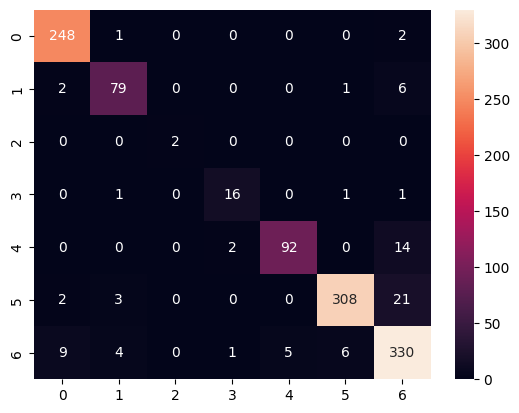

In [27]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,scaled_predictions))

acc = float(accuracy_score(y_test,scaled_predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,scaled_predictions)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

#### Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svc_scaled, X, y, cv = 5)
print(cv_results)

[0.37597234 0.50648228 0.52895419 0.83304498 0.73875433]


Stratified Cross validation

In [29]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation
cv_results = cross_val_score(svc_scaled, X, y, cv=stratified_kfold)

# Print the results
print("Cross-validation scores:", cv_results)
print("Mean CV score:", cv_results.mean())


Cross-validation scores: [0.92221262 0.92221262 0.92653414 0.92906574 0.92820069]
Mean CV score: 0.925645162737422


Saving the modle in different formats

In [30]:
import joblib

# Save the pipeline (scaler + SVM)
joblib.dump(svc_scaled, 'svm_scaled_model.pkl')


['svm_scaled_model.pkl']

In [31]:
from joblib import dump, load

# Assuming model is your trained model
dump(svc_scaled, 'age_model.joblib')


['age_model.joblib']